## Analysis of the MetOcean Stokes drift data from the Wadden Sea

In [53]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

with open('/Users/erik/Downloads/waddendrifters.json') as f:
    data = json.load(f)

Analysis of time between records for each drifter (set at 30 minutes for the first test; 5 minutes for the second test)

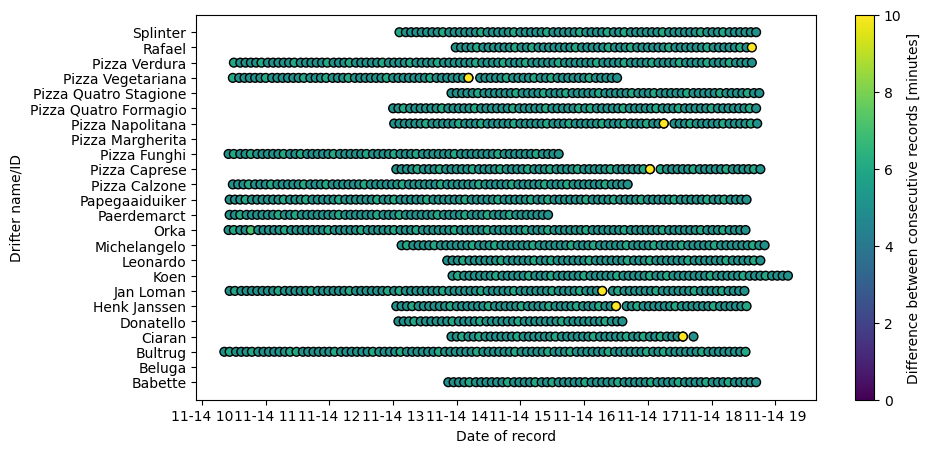

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[m]')
    dt = np.diff(times)
    sc = ax.scatter(times[:-1], (len(times)*[i])[:-1], s=40, c=dt, vmin=0, vmax=10, cmap='viridis', edgecolor='k')
ax.set_yticklabels([])
plt.colorbar(sc, ax=ax, label="Difference between consecutive records [minutes]")
ax.set_yticks(range(len(data.keys())), data.keys())
ax.set_ylabel('Drifter name/ID')
ax.set_xlabel('Date of record')
plt.show()

Analysis of the speed of the drifters as a function of time

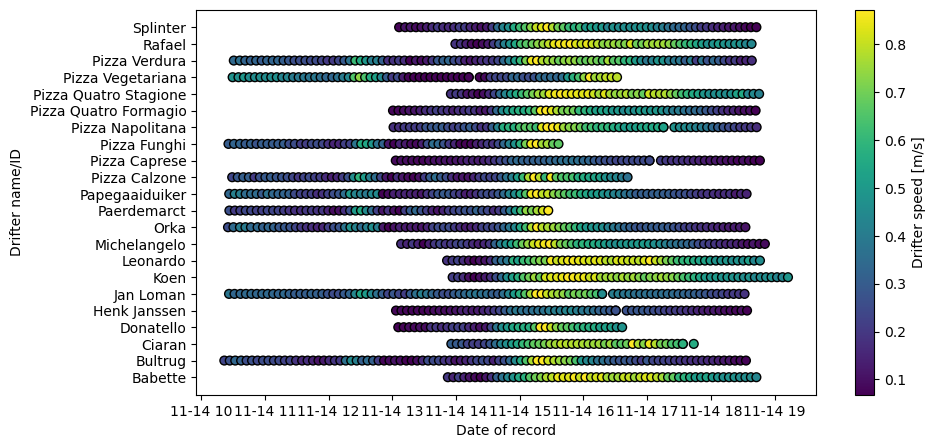

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[s]')
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    dt = np.diff(times)
    dx = np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180)
    dy = np.diff(lats)*1852*60
    u = dx/dt.astype(float)
    v = dy/dt.astype(float)
    sc = ax.scatter(times[:-1], (len(times)*[i])[:-1], s=40, c=np.hypot(u, v), cmap='viridis', edgecolor='k')
ax.set_yticklabels([])
plt.colorbar(sc, ax=ax, label="Drifter speed [m/s]")
ax.set_yticks(range(len(data.keys())), data.keys())
ax.set_ylabel('Drifter name/ID')
ax.set_xlabel('Date of record')
plt.show()

Analysis of the speed of the drifters as a function of location

/var/folders/1n/500ln6w97859_nqq86vwpl000000gr/T/ipykernel_91391/4115211485.py:9: RuntimeWarning: invalid value encountered in divide
  u = dx/dt.astype(float)
/var/folders/1n/500ln6w97859_nqq86vwpl000000gr/T/ipykernel_91391/4115211485.py:10: RuntimeWarning: invalid value encountered in divide
  v = dy/dt.astype(float)
/var/folders/1n/500ln6w97859_nqq86vwpl000000gr/T/ipykernel_91391/4115211485.py:9: RuntimeWarning: divide by zero encountered in divide
  u = dx/dt.astype(float)
/var/folders/1n/500ln6w97859_nqq86vwpl000000gr/T/ipykernel_91391/4115211485.py:10: RuntimeWarning: divide by zero encountered in divide
  v = dy/dt.astype(float)


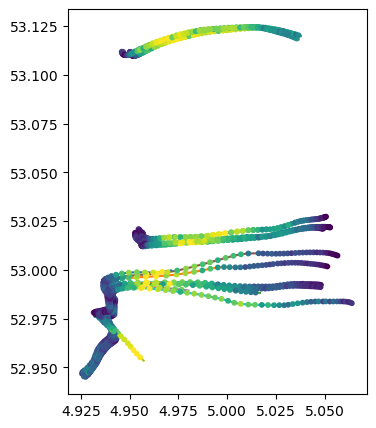

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[m]')
    dt = np.diff(times)
    dx = np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180)
    dy = np.diff(lats)*1852*60
    u = dx/dt.astype(float)
    v = dy/dt.astype(float)

    ax.plot(lons, lats, '-')
    sc = ax.scatter(lons[:-1], lats[:-1], s=10, c=np.hypot(u, v), label=drifter, zorder=10)

ax.set_aspect('equal')
plt.show()

Analysis of the orientation of the drifters (up or down)

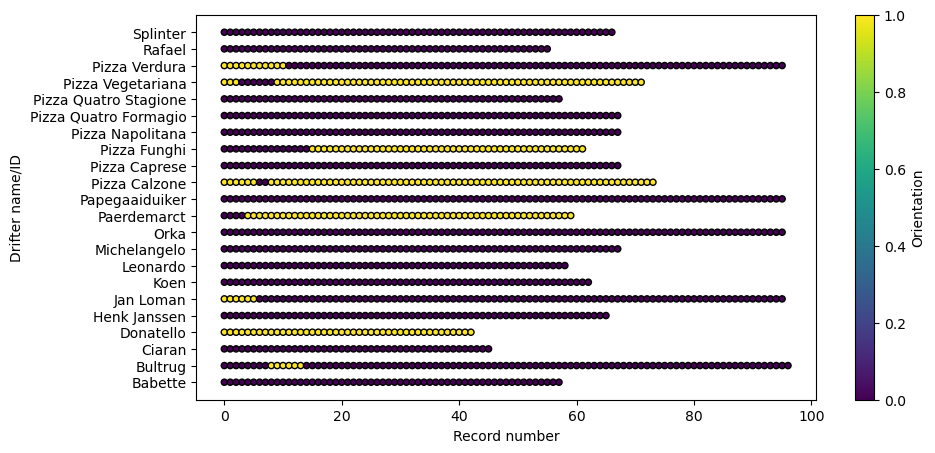

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    orientation = [d[3] for d in data[drifter]]
    plt.scatter(range(len(orientation)), (len(orientation)*[i]), vmin=0, vmax=1, s=20, c=orientation, cmap='viridis', edgecolor='k')
plt.colorbar(label="Orientation")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name/ID')
plt.xlabel('Record number')
plt.show()

Analysis of battery voltage

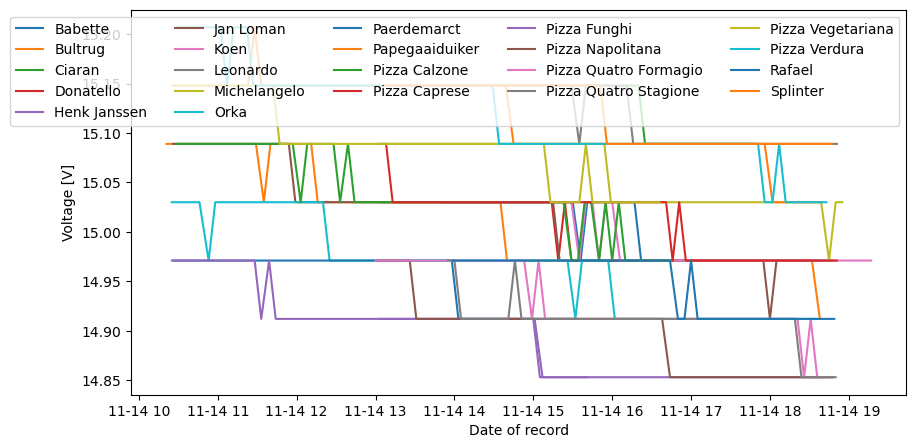

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[m]')
    voltage = [d[4] for d in data[drifter]]
    ax.plot(times, voltage, label=drifter)
plt.legend(ncol=5)
plt.xlabel('Date of record')
plt.ylabel('Voltage [V]')
plt.show()

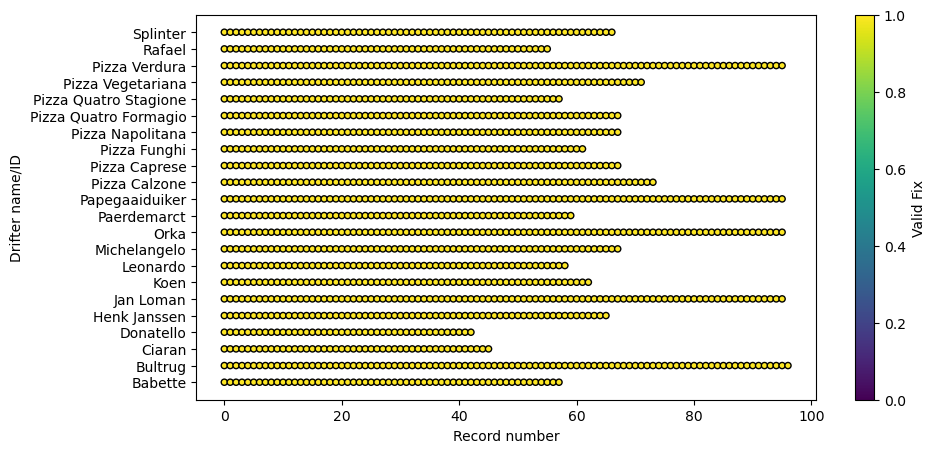

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    validFix = [d[5] for d in data[drifter]]
    plt.scatter(range(len(validFix)), (len(validFix)*[i]), s=20, c=validFix, vmin=0, vmax=1, cmap='viridis', edgecolor='k')
plt.colorbar(label="Valid Fix")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name/ID')
plt.xlabel('Record number')
plt.show()

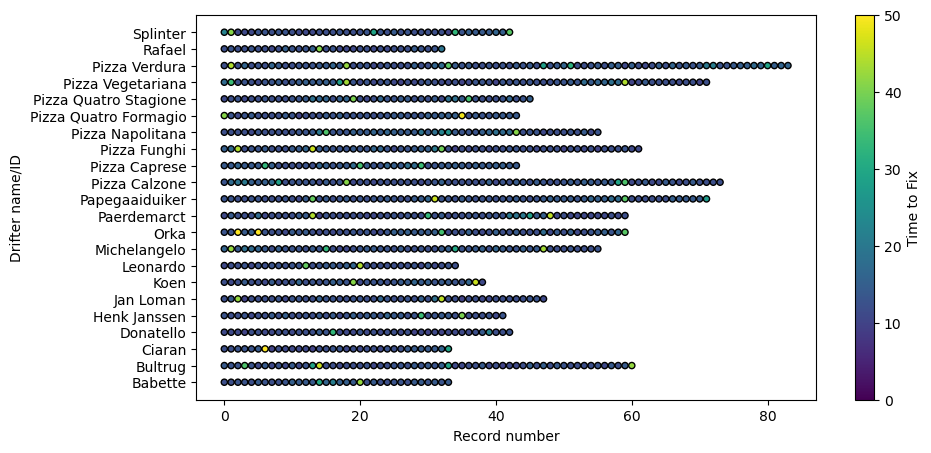

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    timetoFix = [d[6] for d in data[drifter]]
    plt.scatter(range(len(timetoFix)), (len(timetoFix)*[i]), s=20, c=timetoFix, vmin=0, vmax=50, cmap='viridis', edgecolor='k')
plt.colorbar(label="Time to Fix")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name/ID')
plt.xlabel('Record number')
plt.show()

Analysis of the sea surface temperature at the location of the drifters

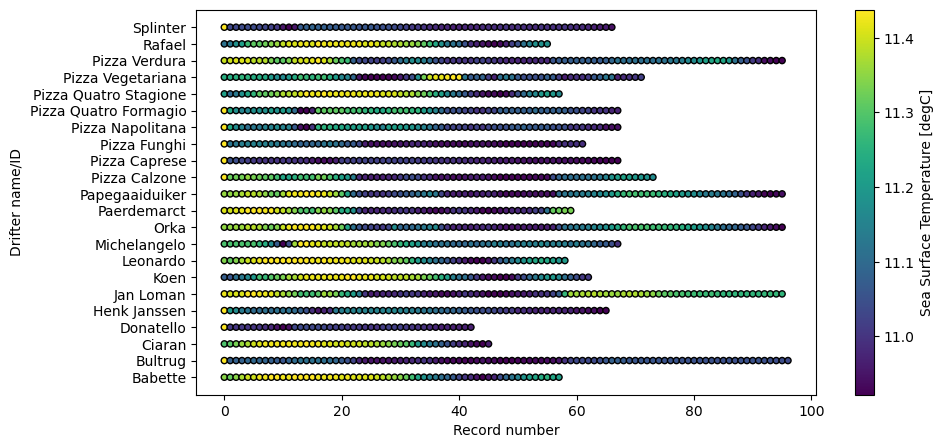

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    timetoFix = [d[8] for d in data[drifter]]
    plt.scatter(range(len(timetoFix)), (len(timetoFix)*[i]), s=20, c=timetoFix, cmap='viridis', edgecolor='k')
plt.colorbar(label="Sea Surface Temperature [degC]")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name/ID')
plt.xlabel('Record number')
plt.show()
